In [463]:

# Echarts.js 파이썬 버전
# !pip3 install pyecharts
!pip uninstall pyecharts

Found existing installation: pyecharts 1.9.1
Uninstalling pyecharts-1.9.1:
  Would remove:
    /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyecharts-1.9.1.dist-info/*
    /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyecharts/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [659]:
# EDA 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pyecharts
import pyecharts

import time
import requests
from bs4 import BeautifulSoup
import json
import urllib

In [3]:
# 지수표현식 출력 변경
pd.options.display.float_format = '{:.2f}'.format

In [412]:
# 한글 표현
plt.rcParams['font.family'] = 'AppleGothic'

# 데이터 세부내용
---

</br>

## 지역별 방문자수 
</br>

> 데이터 세부내용

|데이터명|이동통신데이터|
|:---|:---|
|데이터 제공처|(주)케이티|
|제공 목적|지역방문자 이동행태 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|(주)케이티 -> 한국관광공사| 

</br>

## 지역별 관광지출액

> 데이터 세부내용

|데이터명|신용카드 데이터|
|:---|:---|
|데이터 제공처|비씨카드(주), 신한카드|
|제공 목적|지자체별, 관광업종별 관광소비액 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|신용카드사 -> 한국관광공사|

</br>

## 지역별 검색건수

> 데이터 세부내용

|데이터명|내비게이션 데이터|
|:---|:---|
|데이터 제공처|티맵 모빌리티(주)|
|제공 목적|지자체별, 관광지유형별 방문객 이동행태 분석|
|데이터 기간|2018년~|
|데이터 단위|일단위|
|적재주기|일단위|
|작성체계|티맵 모빌리티 -> 한국관광공사|

</br>

## 코로나 데이터

# 데이터 불러오기
---

> 2018

In [38]:
# 2018 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2018_visit = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_광역별 방문자 수.csv', encoding = 'cp949')
df_2018_transition = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_방문자 수 추이.csv', encoding = 'cp949')
df_2018_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195242__2018-2018_데이터랩_다운로드/20220627195242_방문자수 히트맵.csv', encoding = 'cp949')  

In [24]:
# 2018 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2018_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_관광소비 추이.csv',encoding = 'cp949')
df_2018_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_관광소비 히트맵.csv',encoding = 'cp949')
df_2018_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_업종별 지출액.csv',encoding = 'cp949')
df_2018_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192045__2018-2018_데이터랩_다운로드/20220628192045_지역별 지출액.csv',encoding = 'cp949')

In [25]:
# 2018 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2018_search_type = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_유형별 검색건수.csv', encoding='cp949')
df_2018_regional_search_transition = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_지역별 검색건수 추이.csv', encoding='cp949')
df_2018_regional_search = pd.read_csv('data/네비게이션/20220628192424__2018-2018_데이터랩_다운로드/20220628192424_지역별 검색건수.csv', encoding='cp949')

> 2019

In [26]:
# 2019 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2019_visit = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_광역별 방문자 수.csv', encoding = 'cp949')
df_2019_transition = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_방문자 수 추이.csv', encoding = 'cp949')
df_2019_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195251__2019-2019_데이터랩_다운로드/20220627195251_방문자수 히트맵.csv', encoding = 'cp949')

In [27]:
# 2019 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2019_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_관광소비 추이.csv', encoding = 'cp949')
df_2019_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_관광소비 히트맵.csv', encoding = 'cp949')
df_2019_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_업종별 지출액.csv', encoding = 'cp949')
df_2019_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192055__2019-2019_데이터랩_다운로드/20220628192055_지역별 지출액.csv', encoding = 'cp949')

In [28]:
# 2019 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2019_search_type = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_유형별 검색건수.csv', encoding = 'cp949')
df_2019_regional_search_transition = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_지역별 검색건수 추이.csv', encoding = 'cp949')
df_2019_regional_search = pd.read_csv('data/네비게이션/20220628192434__2019-2019_데이터랩_다운로드/20220628192434_지역별 검색건수.csv', encoding = 'cp949')

> 2020

In [29]:
# 2020 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2020_visit = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_광역별 방문자 수.csv', encoding = 'cp949')
df_2020_transition = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_방문자 수 추이.csv', encoding = 'cp949')
df_2020_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195259__2020-2020_데이터랩_다운로드/20220627195259_방문자수 히트맵.csv', encoding = 'cp949')

In [30]:
# 2020 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2020_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_관광소비 추이.csv',encoding = 'cp949')
df_2020_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_관광소비 히트맵.csv',encoding = 'cp949')
df_2020_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_업종별 지출액.csv',encoding = 'cp949')
df_2020_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192103__2020-2020_데이터랩_다운로드/20220628192103_지역별 지출액.csv',encoding = 'cp949')

In [31]:
# 2020 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2020_search_type = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_유형별 검색건수.csv', encoding='cp949')
df_2020_regional_search_transition = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_지역별 검색건수 추이.csv', encoding='cp949')
df_2020_regional_search = pd.read_csv('data/네비게이션/20220628192446__2020-2020_데이터랩_다운로드/20220628192446_지역별 검색건수.csv', encoding='cp949')

> 2021

In [32]:
# 2021 방문자수, 방문자 추이, 방문자 히트맵 데이터
df_2021_visit = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_광역별 방문자 수.csv', encoding = 'cp949')
df_2021_transition = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_방문자 수 추이.csv', encoding = 'cp949')
df_2021_heatmap = pd.read_csv('data/지역별 방문자 수/20220627195310__2021-2021_데이터랩_다운로드/20220627195310_방문자수 히트맵.csv', encoding = 'cp949')

In [33]:
# 2021 관광소비 추이, 관광소비 히트맵, 업종별 지출액, 지역별 지출액
df_2021_consum_transition = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_관광소비 추이.csv', encoding = 'cp949')
df_2021_consum_heatmap = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_관광소비 히트맵.csv', encoding = 'cp949')
df_2021_industrial_expenditure = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_업종별 지출액.csv', encoding = 'cp949')
df_2021_regional_expenditure = pd.read_csv('data/지역별 관광지출/20220628192110__2021-2021_데이터랩_다운로드/20220628192110_지역별 지출액.csv', encoding = 'cp949')

In [34]:
# 2021 유형별 검색건수, 지역별 검색건수 추이, 지역별 검색건수
df_2021_search_type = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_유형별 검색건수.csv', encoding='cp949')
df_2021_regional_search_transition = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_지역별 검색건수 추이.csv', encoding='cp949')
df_2021_regional_search = pd.read_csv('data/네비게이션/20220628192547__2021-2021_데이터랩_다운로드/20220628192547_지역별 검색건수.csv', encoding='cp949')

# EDA

In [35]:
df_2018_visit

,광역지자체명,기초지자체명,광역지자체 방문자 수,광역지자체 방문자 비율,기초지자체 방문자 수,기초지자체 방문자 비율
0,강원도,고성군,239201073.00,3.30,9902786.00,4.10
1,강원도,춘천시,239201073.00,3.30,26684111.00,11.20
2,강원도,원주시,239201073.00,3.30,29707426.00,12.40
3,강원도,강릉시,239201073.00,3.30,31662185.00,13.20
4,강원도,동해시,239201073.00,3.30,10110320.00,4.20
...,...,...,...,...,...,...
245,충청북도,단양군,226738982.00,3.10,8282963.00,3.70
246,충청북도,청주시 상당구,226738982.00,3.10,29496991.00,13.00
247,충청북도,청주시 서원구,226738982.00,3.10,31070361.00,13.70
248,충청북도,청주시 흥덕구,226738982.00,3.10,33534409.00,14.80


In [1205]:
df_2018_visit['광역지자체명'].unique(), len(df_2018_visit['광역지자체명'].unique())

(array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
        '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
        '충청남도', '충청북도'], dtype=object),
 17)

## column 해석
---
광역지자체 
> 도 : 8개 <br>광역시 : 6개<br>자치시 : 1개<br>특별시 : 1개<br>자치도 : 1개<br> 
- 광역지자체 방문자 비율 : 전국대비 광역지자체 방문자 수 비율

기초지자체
> 1) 행안부 기준, 226개 기초지자체 <br> 2) 제주특별자치도의 제주시, 서귀포시와 세종특별자치시의 세종시 등 3개 행정시 <br> 3) 고양, 성남, 수원, 안산, 안양, 용인, 전주, 창원, 천안, 포항 11개 기초지자체 <br> 4) 3)의 11개 기초지자체의 하위 행정구 32개 <br> 총 250개

- 기초지자체 방문자 비율 : 광역지자체 대비 기초지자체 방문자 수 비율

In [36]:
df_2018_transition

,기준년월,광역지자체,방문자 구분,방문자 수,전년도 방문자 수
0,2018,전국,현지인방문자(a),8037605737.00,0.00
1,2018,전국,외지인방문자(b),2734990786.00,0.00
2,2018,전국,외국인방문자(c),52487043.00,0.00
3,2018,전국,외부방문자(b+c),2787477829.00,0.00
4,2018,전국,전체방문자(a+b+c),10825083566.00,0.00


> 주요 타겟 : 외부방문자(b+C) 

In [46]:
df_2019_heatmap.set_index('광역지자체')['방문자 수']

광역지자체
서울특별시     676239448.00
부산광역시     154956548.00
대구광역시     107487542.00
인천광역시     186061142.00
광주광역시      66038784.00
대전광역시      83628100.00
울산광역시      48862667.00
세종특별자치시    25285404.00
경기도       664749407.00
강원도       145612023.00
충청북도      105848957.00
충청남도      156262000.00
전라북도       93066716.00
전라남도      119694029.00
경상북도      173737828.00
경상남도      153464716.00
제주특별자치도    58816696.00
Name: 방문자 수, dtype: float64

In [49]:
df_2019_heatmap.set_index('광역지자체')['전년도 방문자 수']

광역지자체
서울특별시     606282720.00
부산광역시     149628499.00
대구광역시     105117110.00
인천광역시     159550161.00
광주광역시      63837307.00
대전광역시      82585850.00
울산광역시      46433222.00
세종특별자치시    23109587.00
경기도       591259444.00
강원도       135219733.00
충청북도      102455188.00
충청남도      149123906.00
전라북도       89813652.00
전라남도      112787550.00
경상북도      166970809.00
경상남도      148321065.00
제주특별자치도    54982027.00
Name: 전년도 방문자 수, dtype: float64

> 1. 데이터 크기 (N rows x M columns, 메모리 크기) 

</br>

> 2. 결측치 체크 

</br>

> 3. dtype이 object인 column을 체크

In [1207]:
df_2019_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [1208]:
df_2020_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [1209]:
df_2021_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광역지자체명        250 non-null    object 
 1   기초지자체명        250 non-null    object 
 2   광역지자체 방문자 수   250 non-null    float64
 3   광역지자체 방문자 비율  250 non-null    float64
 4   기초지자체 방문자 수   250 non-null    float64
 5   기초지자체 방문자 비율  250 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


> 각 연도별 비교를 위해 데이터 프레임을 새로 만듭니다.

In [41]:
df_2020_heatmap

,광역지자체,방문자 수,전년도 방문자 수
0,서울특별시,486063680.00,676239448.00
1,부산광역시,125355958.00,154956548.00
2,대구광역시,86338895.00,107487542.00
3,인천광역시,137306507.00,186061142.00
4,광주광역시,56689650.00,66038784.00
5,대전광역시,69557253.00,83628100.00
6,울산광역시,43482816.00,48862667.00
7,세종특별자치시,23948388.00,25285404.00
8,경기도,550763372.00,664749407.00
9,강원도,131296509.00,145612023.00


In [42]:
df_2021_heatmap

,광역지자체,방문자 수,전년도 방문자 수
0,서울특별시,487463395.00,486063680.00
1,부산광역시,124393966.00,125355958.00
2,대구광역시,87781593.00,86338895.00
3,인천광역시,136489732.00,137306507.00
4,광주광역시,56320473.00,56689650.00
5,대전광역시,69189201.00,69557253.00
6,울산광역시,43034413.00,43482816.00
7,세종특별자치시,25413200.00,23948388.00
8,경기도,552531290.00,550763372.00
9,강원도,130321244.00,131296509.00


In [ ]:
# diff= []
# for index,row in enumerate(df_2019_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# for index,row in enumerate(df_2020_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# for index,row in enumerate(df_2021_heatmap['방문자 수']):
#     last_year_visitor = df1.iloc[index]['전년도 방문자 수']
#     diff.append((row - last_year_visitor)/ last_year_visitor * 100)
# df1['diff'] = diff
# df1

In [160]:
#pd.concat([df_2018['방문자 수'], df_2019['방문자 수'], df_2020['방문자 수'], df_2021['방문자 수']], axis =1, names=[2018, 2019, 2020,2021])
# d = {'2018':df_2018['방문자 수'], '2019':df_2019['방문자 수'], '2020':df_2020['방문자 수'], '2021':df_2021['방문자 수'] }
index_list =  df_2018_heatmap['광역지자체']

> 각 연도별 방문자 수

In [206]:
df_total_visit = pd.concat([df_2018_heatmap['방문자 수'], df_2019_heatmap['방문자 수'], df_2020_heatmap['방문자 수'], df_2021_heatmap['방문자 수']], axis =1).rename(index_list)
df_total_visit.columns = [2018, 2019, 2020, 2021]
df_total_visit

,2018,2019,2020,2021
서울특별시,606282720.00,676239448.00,486063680.00,487463395.00
부산광역시,149628499.00,154956548.00,125355958.00,124393966.00
대구광역시,105117110.00,107487542.00,86338895.00,87781593.00
인천광역시,159550161.00,186061142.00,137306507.00,136489732.00
광주광역시,63837307.00,66038784.00,56689650.00,56320473.00
대전광역시,82585850.00,83628100.00,69557253.00,69189201.00
울산광역시,46433222.00,48862667.00,43482816.00,43034413.00
세종특별자치시,23109587.00,25285404.00,23948388.00,25413200.00
경기도,591259444.00,664749407.00,550763372.00,552531290.00
강원도,135219733.00,145612023.00,131296509.00,130321244.00


<AxesSubplot:>

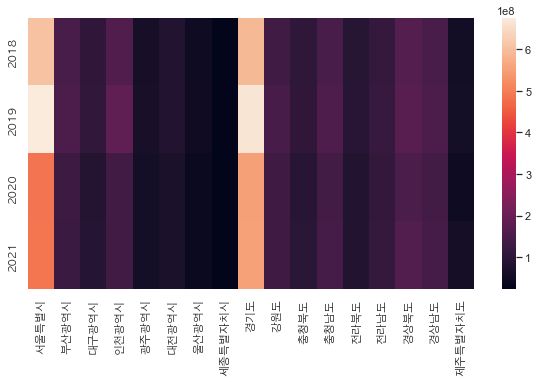

In [1198]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10,5))
plt.xticks(rotation = -45)
sns.set_theme(style='whitegrid')
sns.heatmap(data = df_total_visit.transpose())

## 문제점
---
> 서울특별시와 경기도만 연간 방문자 최대 6억명으로 값이 너무 튐.

> 시각화를 위해 값의 조정이 필요하다고 판단

> 기초지자체가 겹치는 이름이 확인됨. e.g. 중구 

### 멀티인덱스 생성
> 기초지자체는 광역지자체에 소속되어 있으므로 2차원 멀티 인덱싱

In [ ]:
list_index = df_total_visit.index.tolist()
list_col = df_total_visit.columns.tolist()

In [420]:
# 2차원 멀티 인덱스 리스트 생성
mul_index = [
    [],
    []
]
for ind in list_index:
    for col in list_col:
        mul_index[0].append(ind)
        mul_index[1].append(col)

In [555]:
test1 = pd.concat([df_total_visit.iloc[i] for i in range(len(df_total_visit))])

> 막대그래프를 그리기 위해 모든 벨류 1행으로 압축

In [556]:
test2 = pd.DataFrame(data = test1.values.tolist(), index = mul_index).transpose()
test2

서울특별시                                               부산광역시  \
          2018         2019         2020         2021         2018   
0 606282720.00 676239448.00 486063680.00 487463395.00 149628499.00   

                                                대구광역시               ...  \
          2019         2020         2021         2018         2019  ...   
0 154956548.00 125355958.00 124393966.00 105117110.00 107487542.00  ...   

          경상북도                      경상남도                            \
          2020         2021         2018         2019         2020   
0 152858211.00 161590338.00 148321065.00 153464716.00 139633588.00   

                   제주특별자치도                                      
          2021        2018        2019        2020        2021  
0 140785495.00 54982027.00 58816696.00 46601527.00 59563739.00  

[1 rows x 68 columns]

<AxesSubplot:>

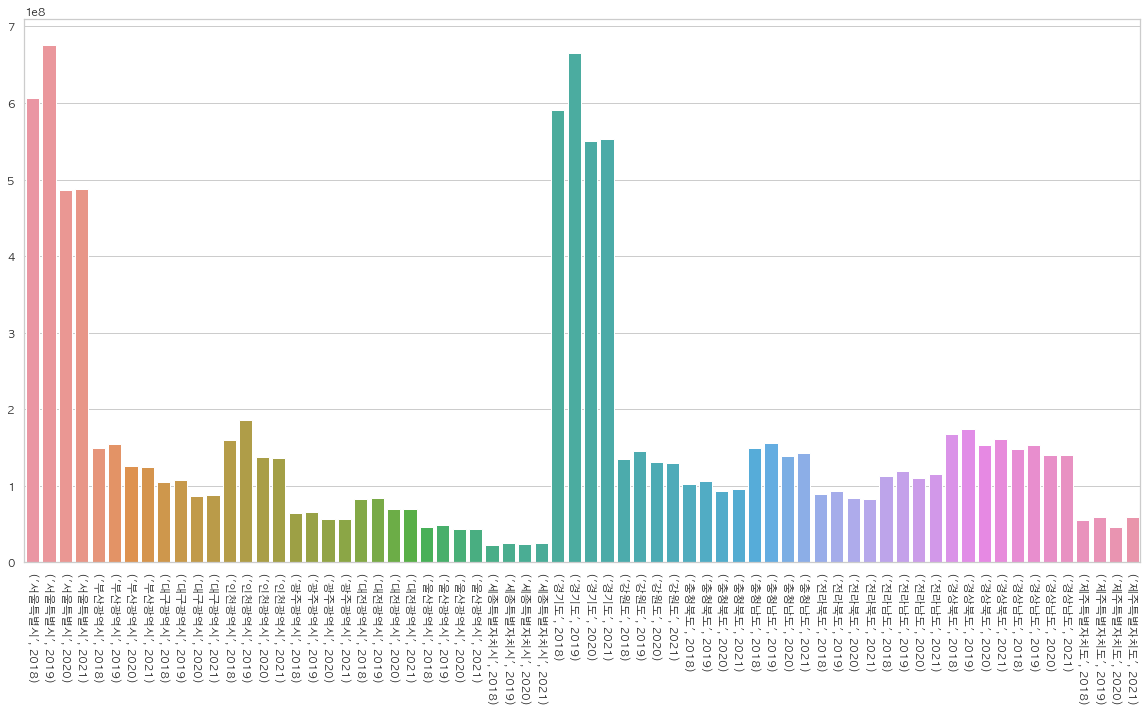

In [1197]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(20,10))
plt.xticks(rotation = -90)
sns.set_theme(style='whitegrid')
sns.barplot(data = test2)

> 실제로 서울과 경기도 값이 많이 튀는 것을 확인

> 비율로 변환

In [518]:
df_total_visit

,2018,2019,2020,2021
서울특별시,606282720.00,676239448.00,486063680.00,487463395.00
부산광역시,149628499.00,154956548.00,125355958.00,124393966.00
대구광역시,105117110.00,107487542.00,86338895.00,87781593.00
인천광역시,159550161.00,186061142.00,137306507.00,136489732.00
광주광역시,63837307.00,66038784.00,56689650.00,56320473.00
대전광역시,82585850.00,83628100.00,69557253.00,69189201.00
울산광역시,46433222.00,48862667.00,43482816.00,43034413.00
세종특별자치시,23109587.00,25285404.00,23948388.00,25413200.00
경기도,591259444.00,664749407.00,550763372.00,552531290.00
강원도,135219733.00,145612023.00,131296509.00,130321244.00


### 년도 별 방문자 추이 비율
> (기준년 방문자 - 전년도 방문자) / 전년도 방문자

In [150]:
#년도 별 방문자 추이 비율
rate_19 = (df_2019_heatmap['방문자 수'] - df_2019_heatmap['전년도 방문자 수'])/df_2019_heatmap['전년도 방문자 수']
rate_20 = (df_2020_heatmap['방문자 수'] - df_2020_heatmap['전년도 방문자 수'])/df_2020_heatmap['전년도 방문자 수']
rate_21 = (df_2021_heatmap['방문자 수'] - df_2021_heatmap['전년도 방문자 수'])/df_2021_heatmap['전년도 방문자 수']

In [562]:
df_total_transition_rate = pd.DataFrame(#index=df_2018_heatmap.광역지자체,
                                       data={'rate_19':rate_19,
                                             'rate_20':rate_20,
                                             'rate_21':rate_21})
df_total_transition_rate.set_index(df_2018_heatmap['광역지자체'], inplace=True)
df_total_transition_rate

,rate_19,rate_20,rate_21
광역지자체,,,
서울특별시,0.12,-0.28,0.00
부산광역시,0.04,-0.19,-0.01
대구광역시,0.02,-0.20,0.02
인천광역시,0.17,-0.26,-0.01
광주광역시,0.03,-0.14,-0.01
대전광역시,0.01,-0.17,-0.01
울산광역시,0.05,-0.11,-0.01
세종특별자치시,0.09,-0.05,0.06
경기도,0.12,-0.17,0.00


> 각 년도 시즌별 방문자 추이율 밀도 확인

<AxesSubplot:title={'center':'방문자 추이 밀도'}, ylabel='Density'>

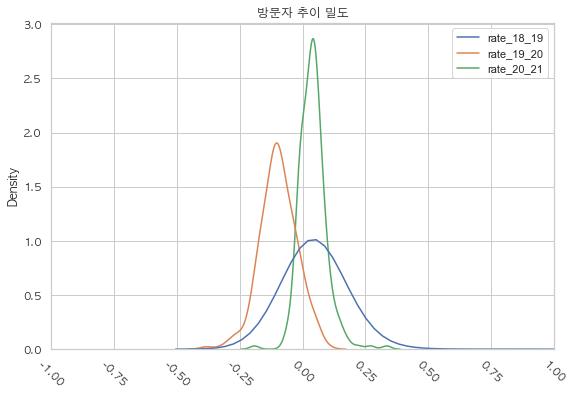

In [1196]:
# 증감 비율 시즌별 밀도 그래프
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(9,6))
plt.xticks(rotation = -45,)
plt.xlim(-1,1)
plt.title('방문자 추이 밀도')
sns.set_theme(style='whitegrid')
sns.kdeplot(data = df_total_transition_rate)

> 19년도에서 20년도는 코로나로 인해 값 밀도가 음수에 몰려있음.

> 20년도에서 21년도는 코로나 방역지침 완화로 비율 값이 양수에 높은 밀도로 몰려있음.

### 멀티인덱싱 수정
---
> 위에서 했던 멀티인덱싱은 pandas MultiIndex 객체로 정의하지 않아서 각 인덱스 level별로 접근이 어려움 (차원별로 접근이 어려움) 

In [792]:
test3 = pd.DataFrame(df_2018_visit.set_index(['광역지자체명','기초지자체명'])['기초지자체 방문자 수'])
test3

기초지자체 방문자 수
광역지자체명 기초지자체명              
강원도    고성군       9902786.00
       춘천시      26684111.00
       원주시      29707426.00
       강릉시      31662185.00
       동해시      10110320.00
...                     ...
충청북도   단양군       8282963.00
       청주시 상당구  29496991.00
       청주시 서원구  31070361.00
       청주시 흥덕구  33534409.00
       청주시 청원구  25047208.00

[250 rows x 1 columns]

In [922]:
list1 = df_2018_visit['광역지자체명'].values.tolist()
list1

['강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경기도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상남도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '경상북도',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '광주광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역시',
 '대구광역

In [923]:
list2 = df_2018_visit['기초지자체명'].values.tolist()
list2

['고성군',
 '춘천시',
 '원주시',
 '강릉시',
 '동해시',
 '태백시',
 '속초시',
 '삼척시',
 '홍천군',
 '횡성군',
 '영월군',
 '평창군',
 '정선군',
 '철원군',
 '화천군',
 '양구군',
 '인제군',
 '양양군',
 '고양시 덕양구',
 '고양시 일산동구',
 '고양시 일산서구',
 '성남시 수정구',
 '성남시 중원구',
 '성남시 분당구',
 '수원시 장안구',
 '수원시 권선구',
 '수원시 팔달구',
 '수원시 영통구',
 '안산시 상록구',
 '의정부시',
 '안산시 단원구',
 '안양시 만안구',
 '부천시',
 '광명시',
 '평택시',
 '동두천시',
 '안양시 동안구',
 '용인시 처인구',
 '용인시 기흥구',
 '용인시 수지구',
 '과천시',
 '구리시',
 '남양주시',
 '오산시',
 '시흥시',
 '군포시',
 '의왕시',
 '하남시',
 '파주시',
 '이천시',
 '안성시',
 '김포시',
 '화성시',
 '광주시',
 '양주시',
 '포천시',
 '여주시',
 '연천군',
 '가평군',
 '양평군',
 '고성군',
 '창원시 의창구',
 '창원시 성산구',
 '창원시 마산합포구',
 '창원시 마산회원구',
 '창원시 진해구',
 '진주시',
 '통영시',
 '사천시',
 '김해시',
 '밀양시',
 '거제시',
 '양산시',
 '의령군',
 '함안군',
 '창녕군',
 '남해군',
 '하동군',
 '산청군',
 '함양군',
 '거창군',
 '합천군',
 '경주시',
 '김천시',
 '안동시',
 '구미시',
 '영주시',
 '영천시',
 '상주시',
 '문경시',
 '경산시',
 '군위군',
 '의성군',
 '청송군',
 '영양군',
 '영덕군',
 '청도군',
 '고령군',
 '성주군',
 '칠곡군',
 '예천군',
 '봉화군',
 '울진군',
 '울릉군',
 '포항시 남구',
 '포항시 북구',
 '남구',
 '동구',
 '북구',
 '광산구',
 '서구',
 '남구',
 '동구',

#### 멀티 인덱싱을 위해 리스트안에서 튜플로 2차원 인덱스 생성

In [927]:
# 멀티 인덱스 만들기 준비, 리스트 안에 튜플로 감싸야함
tuples = list(zip(list1, list2))
tuples

[('강원도', '고성군'),
 ('강원도', '춘천시'),
 ('강원도', '원주시'),
 ('강원도', '강릉시'),
 ('강원도', '동해시'),
 ('강원도', '태백시'),
 ('강원도', '속초시'),
 ('강원도', '삼척시'),
 ('강원도', '홍천군'),
 ('강원도', '횡성군'),
 ('강원도', '영월군'),
 ('강원도', '평창군'),
 ('강원도', '정선군'),
 ('강원도', '철원군'),
 ('강원도', '화천군'),
 ('강원도', '양구군'),
 ('강원도', '인제군'),
 ('강원도', '양양군'),
 ('경기도', '고양시 덕양구'),
 ('경기도', '고양시 일산동구'),
 ('경기도', '고양시 일산서구'),
 ('경기도', '성남시 수정구'),
 ('경기도', '성남시 중원구'),
 ('경기도', '성남시 분당구'),
 ('경기도', '수원시 장안구'),
 ('경기도', '수원시 권선구'),
 ('경기도', '수원시 팔달구'),
 ('경기도', '수원시 영통구'),
 ('경기도', '안산시 상록구'),
 ('경기도', '의정부시'),
 ('경기도', '안산시 단원구'),
 ('경기도', '안양시 만안구'),
 ('경기도', '부천시'),
 ('경기도', '광명시'),
 ('경기도', '평택시'),
 ('경기도', '동두천시'),
 ('경기도', '안양시 동안구'),
 ('경기도', '용인시 처인구'),
 ('경기도', '용인시 기흥구'),
 ('경기도', '용인시 수지구'),
 ('경기도', '과천시'),
 ('경기도', '구리시'),
 ('경기도', '남양주시'),
 ('경기도', '오산시'),
 ('경기도', '시흥시'),
 ('경기도', '군포시'),
 ('경기도', '의왕시'),
 ('경기도', '하남시'),
 ('경기도', '파주시'),
 ('경기도', '이천시'),
 ('경기도', '안성시'),
 ('경기도', '김포시'),
 ('경기도', '화성시'),
 ('경기도', '광주시'),
 ('경기도', 

#### pandas 멀티인덱스 객체 선언 및 레벨 정의

In [930]:
# 멀티 인덱스, 인덱스 레벨 선언
index = pd.MultiIndex.from_tuples(tuples, names=["광역지자체명", "기초지자체명"])
index

MultiIndex([( '강원도',     '고성군'),
            ( '강원도',     '춘천시'),
            ( '강원도',     '원주시'),
            ( '강원도',     '강릉시'),
            ( '강원도',     '동해시'),
            ( '강원도',     '태백시'),
            ( '강원도',     '속초시'),
            ( '강원도',     '삼척시'),
            ( '강원도',     '홍천군'),
            ( '강원도',     '횡성군'),
            ...
            ('충청북도',     '영동군'),
            ('충청북도',     '증평군'),
            ('충청북도',     '진천군'),
            ('충청북도',     '괴산군'),
            ('충청북도',     '음성군'),
            ('충청북도',     '단양군'),
            ('충청북도', '청주시 상당구'),
            ('충청북도', '청주시 서원구'),
            ('충청북도', '청주시 흥덕구'),
            ('충청북도', '청주시 청원구')],
           names=['광역지자체명', '기초지자체명'], length=250)

In [932]:
regional_18 = pd.DataFrame(data = df_2018_visit['기초지자체 방문자 수'].values, index = index)
regional_18.rename(columns={0:'18년도 기초지자체 방문자 수'}, inplace = True)
regional_18

18년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군            9902786.00
       춘천시           26684111.00
       원주시           29707426.00
       강릉시           31662185.00
       동해시           10110320.00
...                          ...
충청북도   단양군            8282963.00
       청주시 상당구       29496991.00
       청주시 서원구       31070361.00
       청주시 흥덕구       33534409.00
       청주시 청원구       25047208.00

[250 rows x 1 columns]

In [933]:
regional_19 = pd.DataFrame(data = df_2019_visit['기초지자체 방문자 수'].values, index = index)
regional_19.rename(columns={0:'19년도 기초지자체 방문자 수'}, inplace = True)
regional_19

19년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           10550924.00
       춘천시           30513697.00
       원주시           30608425.00
       강릉시           32299061.00
       동해시           10790192.00
...                          ...
충청북도   단양군            8466913.00
       청주시 상당구       30030642.00
       청주시 서원구       31083847.00
       청주시 흥덕구       33777215.00
       청주시 청원구       26170669.00

[250 rows x 1 columns]

In [934]:
regional_20 = pd.DataFrame(data = df_2020_visit['기초지자체 방문자 수'].values, index = index)
regional_20.rename(columns={0:'20년도 기초지자체 방문자 수'}, inplace = True)
regional_20

20년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           11015058.00
       춘천시           26796235.00
       원주시           27394299.00
       강릉시           31234595.00
       동해시           10308451.00
...                          ...
충청북도   단양군            6764180.00
       청주시 상당구       27714992.00
       청주시 서원구       27654706.00
       청주시 흥덕구       30482701.00
       청주시 청원구       22630232.00

[250 rows x 1 columns]

In [935]:
regional_21 = pd.DataFrame(data = df_2021_visit['기초지자체 방문자 수'].values, index = index)
regional_21.rename(columns={0:'21년도 기초지자체 방문자 수'}, inplace = True)
regional_21

21년도 기초지자체 방문자 수
광역지자체명 기초지자체명                   
강원도    고성군           11562375.00
       춘천시           26862501.00
       원주시           27186987.00
       강릉시           30454953.00
       동해시            9936522.00
...                          ...
충청북도   단양군            7269015.00
       청주시 상당구       27990075.00
       청주시 서원구       27378586.00
       청주시 흥덕구       32269781.00
       청주시 청원구       23174665.00

[250 rows x 1 columns]

### 멀티인덱싱한 데이터프레임 생성

In [939]:
df_regional_1821 = pd.concat([regional_rate_18,regional_rate_19,regional_rate_20,regional_rate_21], axis = 1)
df_regional_1821

18년도 기초지자체 방문자 수  19년도 기초지자체 방문자 수  20년도 기초지자체 방문자 수  \
광역지자체명 기초지자체명                                                          
강원도    고성군            9902786.00       10550924.00       11015058.00   
       춘천시           26684111.00       30513697.00       26796235.00   
       원주시           29707426.00       30608425.00       27394299.00   
       강릉시           31662185.00       32299061.00       31234595.00   
       동해시           10110320.00       10790192.00       10308451.00   
...                          ...               ...               ...   
충청북도   단양군            8282963.00        8466913.00        6764180.00   
       청주시 상당구       29496991.00       30030642.00       27714992.00   
       청주시 서원구       31070361.00       31083847.00       27654706.00   
       청주시 흥덕구       33534409.00       33777215.00       30482701.00   
       청주시 청원구       25047208.00       26170669.00       22630232.00   

                21년도 기초지자체 방문자 수  
광역지자체명 기초지자체명                     
강원도    고성군           11562375.00  
       춘천시           26862501.00  
       원주시           27186987.00  
       강릉시           30454953.00  
       동해시            9936522.00  
...                          ...  
충청북도   단양군            7269015.00  
       청주시 상당구       27990075.00  
       청주시 서원구       27378586.00  
       청주시 흥덕구       32269781.00  
       청주시 청원구       23174665.00  

[250 rows x 4 columns]

In [944]:
# concating_df1 = 
concating_18_19 = pd.DataFrame((df_regional_1821['19년도 기초지자체 방문자 수'] - df_regional_1821['18년도 기초지자체 방문자 수'])/df_regional_1821['18년도 기초지자체 방문자 수']).rename(columns = {0:'18년도 방문자 추이 율'})
concating_18_19

18년도 방문자 추이 율
광역지자체명 기초지자체명                
강원도    고성군               0.07
       춘천시               0.14
       원주시               0.03
       강릉시               0.02
       동해시               0.07
...                       ...
충청북도   단양군               0.02
       청주시 상당구           0.02
       청주시 서원구           0.00
       청주시 흥덕구           0.01
       청주시 청원구           0.04

[250 rows x 1 columns]

In [941]:
concating_19_20 = pd.DataFrame((df_regional_1821['20년도 기초지자체 방문자 수'] - df_regional_1821['19년도 기초지자체 방문자 수'])/df_regional_1821['19년도 기초지자체 방문자 수']).rename(columns = {0:'18년도 방문자 추이 율'})
concating_19_20

18년도 방문자 추이 율
광역지자체명 기초지자체명                
강원도    고성군               0.04
       춘천시              -0.12
       원주시              -0.11
       강릉시              -0.03
       동해시              -0.04
...                       ...
충청북도   단양군              -0.20
       청주시 상당구          -0.08
       청주시 서원구          -0.11
       청주시 흥덕구          -0.10
       청주시 청원구          -0.14

[250 rows x 1 columns]

In [942]:
concating_20_21 = pd.DataFrame((df_regional_1821['21년도 기초지자체 방문자 수'] - df_regional_1821['20년도 기초지자체 방문자 수'])/df_regional_1821['20년도 기초지자체 방문자 수']).rename(columns = {0:'18년도 방문자 추이 율'})
concating_20_21

18년도 방문자 추이 율
광역지자체명 기초지자체명                
강원도    고성군               0.05
       춘천시               0.00
       원주시              -0.01
       강릉시              -0.02
       동해시              -0.04
...                       ...
충청북도   단양군               0.07
       청주시 상당구           0.01
       청주시 서원구          -0.01
       청주시 흥덕구           0.06
       청주시 청원구           0.02

[250 rows x 1 columns]

In [945]:
df_18_21_rate = pd.concat([concating_df1,concating_df2,concating_df3], axis = 1)
df_18_21_rate.rename(columns={0:'18-19rate',1:'19-20rate',2:'20-21rate'}, inplace = True)

### 멀티인덱싱된 연도별 방문자 추이율 데이터프레임 생성

In [981]:
# 기초지자체명 방문자 수 추이율
df_18_21_rate

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                  
강원도    고성군           0.07       0.04       0.05
       춘천시           0.14      -0.12       0.00
       원주시           0.03      -0.11      -0.01
       강릉시           0.02      -0.03      -0.02
       동해시           0.07      -0.04      -0.04
...                   ...        ...        ...
충청북도   단양군           0.02      -0.20       0.07
       청주시 상당구       0.02      -0.08       0.01
       청주시 서원구       0.00      -0.11      -0.01
       청주시 흥덕구       0.01      -0.10       0.06
       청주시 청원구       0.04      -0.14       0.02

[250 rows x 3 columns]

## 연도별 방문자 수 추이율 증가 Top10
---

### 2018-2019

In [1005]:
# 18-19 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '18-19rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
인천광역시  미추홀구         5.69      -0.18      -0.01
전라남도   신안군          0.37      -0.11       0.15
전라북도   임실군          0.29      -0.01       0.14
강원도    화천군          0.29      -0.14      -0.01
       양구군          0.22      -0.20       0.04
인천광역시  중구           0.22      -0.38      -0.04
       서구           0.20      -0.09      -0.02
강원도    철원군          0.20      -0.09       0.04
경기도    하남시          0.20       0.06       0.06
전라남도   진도군          0.20       0.00       0.05

### 2019-2020

In [1128]:
# 19-20(코로나 사태) 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
강원도    양양군          0.04       0.10      -0.06
경상남도   밀양시          0.07       0.07       0.09
전라남도   고흥군          0.04       0.06       0.08
경기도    하남시          0.20       0.06       0.06
       연천군          0.18       0.05       0.06
부산광역시  기장군          0.03       0.05       0.01
인천광역시  옹진군          0.13       0.05      -0.04
부산광역시  북구           0.10       0.05      -0.01
경상북도   고령군          0.05       0.05       0.08
경기도    구리시          0.03       0.04       0.04

### 2020-2021

In [1130]:
# 20-21(코로나 완하) 방문자 수 추이율 증가 top10
df_18_21_rate.sort_values(by = '20-21rate', ascending = False).head(10)

18-19rate  19-20rate  20-21rate
광역지자체명  기초지자체명                                 
제주특별자치도 서귀포시         0.03      -0.21       0.33
        제주시          0.05      -0.20       0.27
경상북도    울릉군          0.13      -0.32       0.22
광주광역시   동구          -0.04      -0.25       0.19
전라남도    구례군          0.03      -0.18       0.17
경상북도    청도군          0.04      -0.08       0.16
서울특별시   강서구          0.08      -0.10       0.15
전라남도    신안군          0.37      -0.11       0.15
광주광역시   서구          -0.02      -0.18       0.14
전라북도    임실군          0.29      -0.01       0.14

## 시각화

In [1187]:
df_20_21_rate_5

18-19rate  19-20rate  20-21rate
광역지자체명  기초지자체명                                 
제주특별자치도 서귀포시         0.03      -0.21       0.33
        제주시          0.05      -0.20       0.27
경상북도    울릉군          0.13      -0.32       0.22
광주광역시   동구          -0.04      -0.25       0.19
전라남도    구례군          0.03      -0.18       0.17

In [1132]:
# 18-19 top5
df_18_19_rate_5 = df_18_21_rate.sort_values(by = '18-19rate', ascending = False).head(5)
# 19-20 top5
df_19_20_rate_5 = df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(5)
# 20-21 top5
df_20_21_rate_5 = df_18_21_rate.sort_values(by = '20-21rate', ascending = False).head(5)

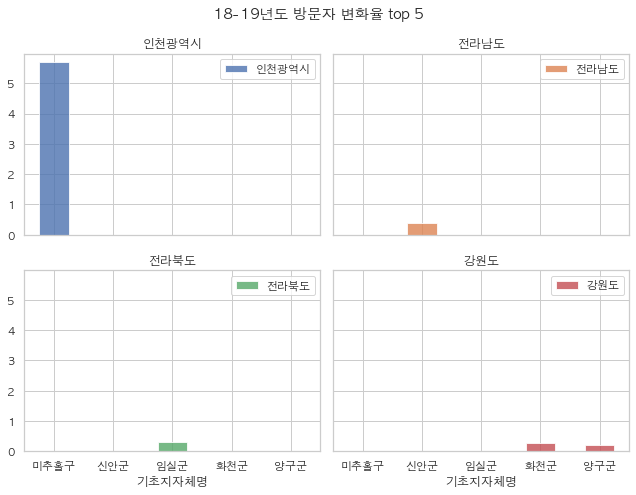

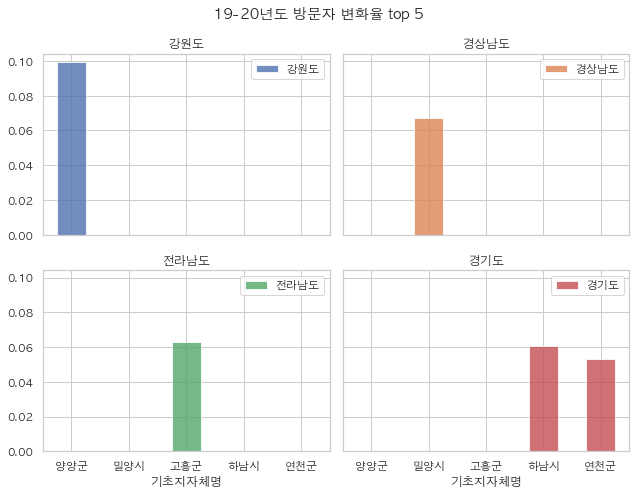

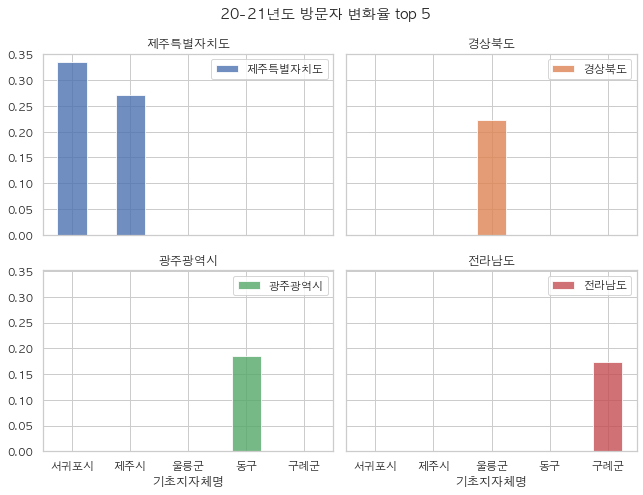

In [1212]:
# 18-21 방문자 변화율 top5
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐 방지
df_18_19_rate_5['18-19rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '18-19년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()
df_19_20_rate_5['19-20rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '19-20년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()
df_20_21_rate_5['20-21rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '20-21년도 방문자 변화율 top 5', layout = (2,2), alpha = 0.8, rot = 0)
plt.tight_layout()

In [1184]:
df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(5)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
강원도    양양군          0.04       0.10      -0.06
경상남도   밀양시          0.07       0.07       0.09
전라남도   고흥군          0.04       0.06       0.08
경기도    하남시          0.20       0.06       0.06
       연천군          0.18       0.05       0.06

In [ ]:
df_18_21_rate['19-20rate'].transpose().unstack(level=0).plot(kind = 'bar',subplots = True, sharey = True, figsize = (9,7), title = '20-21년도 방문자 변화율 top 5', layout = (2,2), rot = 0)
plt.tight_layout()

AttributeError: 'str' object has no attribute 'set_title'

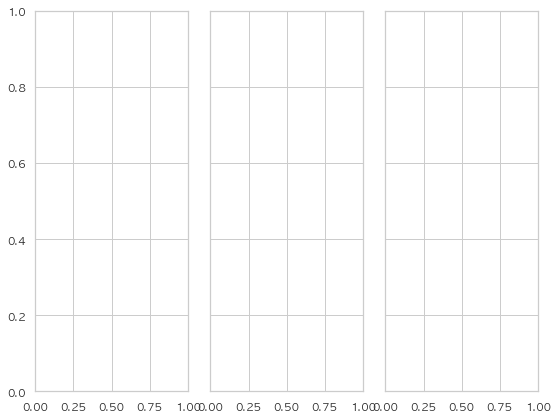

In [1153]:
f, axes = plt.subplots(nrows = 1,
                       ncols = 3,
                       sharey = True,
                       sharex = True)
f.set_size_inches((9,7))

grp = df_18_21_rate.columns.tolist()

plt.subplots_adjust(wspace = 0.15, hspace = 0.15)
for index, col in enumerate(df_18_21_rate.columns):
    df_index = df_18_21_rate[col]
    ax.set_title("{grp}".foramt(grp[i]), fontsize = 12)
plt.tight_layout()

In [1061]:
df_18_21_rate.sort_values(by = '19-20rate', ascending = False).head(5)

18-19rate  19-20rate  20-21rate
광역지자체명 기초지자체명                                 
강원도    양양군          0.04       0.10      -0.06
경상남도   밀양시          0.07       0.07       0.09
전라남도   고흥군          0.04       0.06       0.08
경기도    하남시          0.20       0.06       0.06
       연천군          0.18       0.05       0.06

In [ ]:
plt.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' # 한글 깨짐 방지
df_18_21_rate.sort_values(by = '18-19rate', ascending = False).head(5)['18-19rate'].transpose().unstack(level=0).plot(kind = 'bar', subplots = True, rot= 0, figsize = (9,7), layout = (2,2))  
# plt.xticks(rotation = -90)
plt.ylim(0,6) # y축 최소, 최대 값
plt.tight_layout()

In [601]:
rate_18_19 = (df_total_regional_rate['regional_rate_19'] - df_total_regional_rate['regional_rate_18'])/df_total_regional_rate['regional_rate_18']   
rate_18_19

기초지자체명
고성군       0.07
춘천시       0.14
원주시       0.03
강릉시       0.02
동해시       0.07
          ... 
단양군       0.02
청주시 상당구   0.02
청주시 서원구   0.00
청주시 흥덕구   0.01
청주시 청원구   0.04
Length: 250, dtype: float64

In [602]:
rate_19_20 = (df_total_regional_rate['regional_rate_20'] - df_total_regional_rate['regional_rate_19'])/df_total_regional_rate['regional_rate_19']   
rate_19_20

기초지자체명
고성군        0.04
춘천시       -0.12
원주시       -0.11
강릉시       -0.03
동해시       -0.04
           ... 
단양군       -0.20
청주시 상당구   -0.08
청주시 서원구   -0.11
청주시 흥덕구   -0.10
청주시 청원구   -0.14
Length: 250, dtype: float64

In [603]:
rate_20_21 = (df_total_regional_rate['regional_rate_21'] - df_total_regional_rate['regional_rate_20'])/df_total_regional_rate['regional_rate_20']   
rate_20_21

기초지자체명
고성군        0.05
춘천시        0.00
원주시       -0.01
강릉시       -0.02
동해시       -0.04
           ... 
단양군        0.07
청주시 상당구    0.01
청주시 서원구   -0.01
청주시 흥덕구    0.06
청주시 청원구    0.02
Length: 250, dtype: float64

In [608]:
df_total_transition_rate = pd.DataFrame(#index=df_2018_heatmap.광역지자체,
                                       data={'rate_18_19':rate_18_19,
                                             'rate_19_20':rate_19_20,
                                             'rate_20_21':rate_20_21})
df_total_transition_rate.set_index(df_total_regional_rate.index, inplace=True)
df_total_transition_rate

,rate_18_19,rate_19_20,rate_20_21
기초지자체명,,,
고성군,0.07,0.04,0.05
춘천시,0.14,-0.12,0.00
원주시,0.03,-0.11,-0.01
강릉시,0.02,-0.03,-0.02
동해시,0.07,-0.04,-0.04
...,...,...,...
단양군,0.02,-0.20,0.07
청주시 상당구,0.02,-0.08,0.01
청주시 서원구,0.00,-0.11,-0.01


In [703]:
# 18-19 시즌 기준 내림차순 top10 미추홀구늩 무슨일이 있었던걸까? 19년 3월에 대형화제 발생 연관이 있을까
df_1819_regi_10 = df_total_transition_rate.sort_values(by = 'rate_18_19', ascending=False).head(10)
df_1819_regi_10

,rate_18_19,rate_19_20,rate_20_21
기초지자체명,,,
미추홀구,5.69,-0.18,-0.01
신안군,0.37,-0.11,0.15
임실군,0.29,-0.01,0.14
화천군,0.29,-0.14,-0.01
양구군,0.22,-0.20,0.04
중구,0.22,-0.38,-0.04
서구,0.20,-0.09,-0.02
철원군,0.20,-0.09,0.04
하남시,0.20,0.06,0.06


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 1440x720 with 0 Axes>

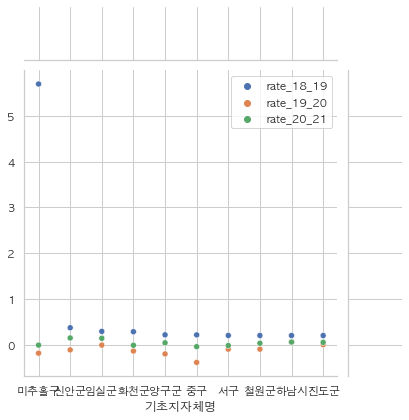

In [722]:
# df_1819_regi_10
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(20,10))
sns.jointplot(data = df_1819_regi_10) 
plt.xticks(rotation = -90)

In [723]:
# 코로나로 타격이 가장 큰 지자체 top10
df_1920_regi_10 = df_total_transition_rate.sort_values(by = 'rate_19_20', ascending=True).head(10) 
df_1920_regi_10

,rate_18_19,rate_19_20,rate_20_21
기초지자체명,,,
중구,0.22,-0.38,-0.04
울릉군,0.13,-0.32,0.22
중구,0.01,-0.29,0.05
정선군,-0.00,-0.28,0.06
서대문구,0.05,-0.27,-0.01
종로구,0.02,-0.26,0.03
중구,-0.00,-0.26,0.03
동구,-0.04,-0.25,0.19
동구,-0.04,-0.24,0.02


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 1440x720 with 0 Axes>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


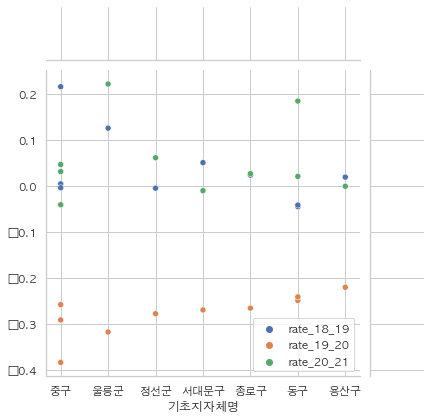

In [724]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(20,10))
sns.jointplot(data = df_1920_regi_10) 
plt.xticks(rotation = -90)

In [700]:
# 코로나를 기회로 삼은 지자체 top10
df_total_transition_rate.sort_values(by = 'rate_19_20', ascending=False)[df_total_transition_rate.sort_values(by = 'rate_19_20', ascending=False)['rate_19_20'] > 0 ].head(10) 

,rate_18_19,rate_19_20,rate_20_21
기초지자체명,,,
양양군,0.04,0.10,-0.06
밀양시,0.07,0.07,0.09
고흥군,0.04,0.06,0.08
하남시,0.20,0.06,0.06
연천군,0.18,0.05,0.06
기장군,0.03,0.05,0.01
옹진군,0.13,0.05,-0.04
북구,0.10,0.05,-0.01
고령군,0.05,0.05,0.08


In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(20,10))
sns.jointplot(data = df_1819_regi_10) 
plt.xticks(rotation = -90)

In [701]:
# 방역기준 완화 후 방문객이 많이진 지자체 top10 이 중 상위 3개 기초지차체는 배 또는 비행기 타고가야하는 곳
df_total_transition_rate.sort_values(by = 'rate_20_21', ascending=False)[df_total_transition_rate.sort_values(by = 'rate_20_21', ascending=False)['rate_20_21'] > 0.1 ].head(10)

,rate_18_19,rate_19_20,rate_20_21
기초지자체명,,,
서귀포시,0.03,-0.21,0.33
제주시,0.05,-0.20,0.27
울릉군,0.13,-0.32,0.22
동구,-0.04,-0.25,0.19
구례군,0.03,-0.18,0.17
청도군,0.04,-0.08,0.16
강서구,0.08,-0.10,0.15
신안군,0.37,-0.11,0.15
서구,-0.02,-0.18,0.14


In [634]:
df_2018_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         67686627.00
쇼핑업      10058041902.00
쇼핑업       2520958865.00
쇼핑업        712317323.00
숙박업        854327421.00
숙박업          4382556.00
숙박업        205035360.00
숙박업        491787945.00
식음료업     21593337884.00
여가서비스업    1299557625.00
여가서비스업     101185222.00
여가서비스업     625030824.00
여가서비스업     535003349.00
여가서비스업      20898397.00
여가서비스업           507.00
여행업        218445190.00
운송업         56694515.00
운송업         63180185.00
운송업        955744628.00
운송업        692416903.00
Name: 중분류 지출액, dtype: float64

In [635]:
df_2019_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         72632366.00
쇼핑업       9728964103.00
쇼핑업       2290048613.00
쇼핑업        687938988.00
숙박업        822871407.00
숙박업          4879110.00
숙박업        196978690.00
숙박업        523308018.00
식음료업     21641442299.00
여가서비스업    1448687196.00
여가서비스업     110348899.00
여가서비스업     625161038.00
여가서비스업     577819599.00
여가서비스업      20795688.00
여가서비스업           368.00
여행업        192964640.00
운송업         67407644.00
운송업         66855378.00
운송업        933012102.00
운송업        679509730.00
Name: 중분류 지출액, dtype: float64

In [636]:
df_2020_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         51314802.00
쇼핑업       8455684093.00
쇼핑업       2035264399.00
쇼핑업        230098354.00
숙박업        636359014.00
숙박업          8522049.00
숙박업        156508172.00
숙박업        372998730.00
식음료업     17533846879.00
여가서비스업    1663742200.00
여가서비스업      73622741.00
여가서비스업     227489898.00
여가서비스업     218338049.00
여가서비스업      12096561.00
여가서비스업             0.00
여행업         38990229.00
운송업         74313312.00
운송업         47473723.00
운송업        507447357.00
운송업        190639752.00
Name: 중분류 지출액, dtype: float64

In [637]:
df_2021_industrial_expenditure.set_index('대분류')['중분류 지출액']

대분류
쇼핑업         68317049.00
쇼핑업       9070338231.00
쇼핑업       2039043502.00
쇼핑업        242849135.00
숙박업        665639297.00
숙박업          9401921.00
숙박업        188365100.00
숙박업        443033597.00
식음료업     16587818731.00
여가서비스업    1985027748.00
여가서비스업      97354293.00
여가서비스업     214610969.00
여가서비스업     263574642.00
여가서비스업       8593866.00
여행업         23909263.00
운송업         94820191.00
운송업         53705098.00
운송업        509736724.00
운송업        191193055.00
Name: 중분류 지출액, dtype: float64

In [638]:
df_2018_regional_search

,광역지자체,기초지자체,광역지자체 검색건수,광역지자체 검색건수 비율,기초지자체 검색건수,기초지자체 검색건수 비율
0,강원도,강릉시,19205254,9.00,3662531,19.10
1,강원도,고성군,19205254,9.00,1094461,5.70
2,강원도,동해시,19205254,9.00,446976,2.30
3,강원도,삼척시,19205254,9.00,951701,5.00
4,강원도,속초시,19205254,9.00,3148510,16.40
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,5714367,2.70,592792,10.40
246,충청북도,청주시 서원구,5714367,2.70,350475,6.10
247,충청북도,청주시 청원구,5714367,2.70,696637,12.20
248,충청북도,청주시 흥덕구,5714367,2.70,644980,11.30


In [645]:
df_2018_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,75907850,35.60
3,문화관광,33896722,15.90
7,숙박,25979085,12.20
5,쇼핑,25684044,12.00
0,자연관광,16751410,7.90
4,레저스포츠,13064751,6.10
8,기타관광,11973036,5.60
1,역사관광,8263751,3.90
2,체험관광,1785636,0.80


In [646]:
df_2019_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,110039686,38.10
3,문화관광,43884465,15.20
7,숙박,34939190,12.10
5,쇼핑,34323033,11.90
0,자연관광,20103620,7.00
4,레저스포츠,16845622,5.80
8,기타관광,16141513,5.60
1,역사관광,10684810,3.70
2,체험관광,2111053,0.70


In [647]:
df_2020_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,129905507,41.10
5,쇼핑,39570345,12.50
7,숙박,37032287,11.70
3,문화관광,36074219,11.40
0,자연관광,25864691,8.20
4,레저스포츠,20092407,6.40
8,기타관광,14692148,4.60
1,역사관광,11306070,3.60
2,체험관광,1596908,0.50


In [648]:
df_2021_search_type.sort_values(by = '유형별 검색건수', ascending = False )

,티맵카테고리중분류명,유형별 검색건수,유형별 검색건수 비율
6,음식,158659552,41.40
5,쇼핑,47306705,12.30
7,숙박,46012890,12.00
3,문화관광,45517868,11.90
0,자연관광,29093741,7.60
4,레저스포츠,24220347,6.30
8,기타관광,17569147,4.60
1,역사관광,13415946,3.50
2,체험관광,1643912,0.40


> 20년도 이후로 문화관광과 쇼핑 순위가 바뀐 것 외에는 특이점없음

In [651]:
df_2019_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2019,전국,전체,289072992,213306220
1,2019,전국,자연관광,20103620,16751407
2,2019,전국,역사관광,10684810,8263745
3,2019,전국,체험관광,2111053,1785621
4,2019,전국,문화관광,43884465,33896703
5,2019,전국,레저스포츠,16845622,13064741
6,2019,전국,쇼핑,34323033,25684032
7,2019,전국,음식,110039686,75907850
8,2019,전국,숙박,34939190,25979085
9,2019,전국,기타관광,16141513,11973036


In [652]:
df_2020_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2020,전국,전체,316134582,289072868
1,2020,전국,자연관광,25864691,20103620
2,2020,전국,역사관광,11306070,10684806
3,2020,전국,체험관광,1596908,2111028
4,2020,전국,문화관광,36074219,43884450
5,2020,전국,레저스포츠,20092407,16845594
6,2020,전국,쇼핑,39570345,34323023
7,2020,전국,음식,129905507,110039666
8,2020,전국,숙박,37032287,34939168
9,2020,전국,기타관광,14692148,16141513


In [653]:
df_2021_regional_search_transition

,기준년월,광역지자체,티맵카테고리중분류명,광역지자체 검색건수,광역지자체 전년도 검색건수
0,2021,전국,전체,383440108,316134433
1,2021,전국,자연관광,29093741,25864665
2,2021,전국,역사관광,13415946,11306064
3,2021,전국,체험관광,1643912,1596908
4,2021,전국,문화관광,45517868,36074181
5,2021,전국,레저스포츠,24220347,20092343
6,2021,전국,쇼핑,47306705,39570333
7,2021,전국,음식,158659552,129905507
8,2021,전국,숙박,46012890,37032284
9,2021,전국,기타관광,17569147,14692148


In [655]:
df_2018_regional_search

,광역지자체,기초지자체,광역지자체 검색건수,광역지자체 검색건수 비율,기초지자체 검색건수,기초지자체 검색건수 비율
0,강원도,강릉시,19205254,9.00,3662531,19.10
1,강원도,고성군,19205254,9.00,1094461,5.70
2,강원도,동해시,19205254,9.00,446976,2.30
3,강원도,삼척시,19205254,9.00,951701,5.00
4,강원도,속초시,19205254,9.00,3148510,16.40
...,...,...,...,...,...,...
245,충청북도,청주시 상당구,5714367,2.70,592792,10.40
246,충청북도,청주시 서원구,5714367,2.70,350475,6.10
247,충청북도,청주시 청원구,5714367,2.70,696637,12.20
248,충청북도,청주시 흥덕구,5714367,2.70,644980,11.30


In [657]:
import time

In [658]:
#공공데이터활용지원센터_보건복지부 코로나19 감염 현황
# 2020, 2021, 2022



url ='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
key = 'suCRrNjscrjE+O8K90jEKvai41x0TWioUg6A5yZSSnTz1DeWKjqj/k4tg1a/BDsFQaKPPnZXGBp9kz1nLHI79Q=='


merged_df = pd.DataFrame([])
for year in range(2020, 2022+1):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5) + round(np.random.random(),2)
    time.sleep(a)
    params = {
        'ServiceKey': key,
        'pageNo': 1,
        'numOfRows':10,
        'startCreateDt': str(year)+ '0101',	
        'endCreateDt':  str(year) + '1231'
    }
    res = requests.get(url, params =params)
    soup = BeautifulSoup(res.text, 'xml')
    date = []
    decideCnt = []
    for item in soup.findAll('item'):
        date.append(item.find('stateDt').get_text())
        decideCnt.append(item.find('decideCnt').get_text())
    pd1 = pd.DataFrame(date, columns=['year'])
    pd2 = pd.DataFrame(decideCnt, columns=['decideCnt'])
    total = pd.concat([pd1, pd2], axis = 1)
    total.sort_values(by=['year'], inplace=True)
    merged_df = pd.concat([merged_df, total])
merged_df.reset_index(drop= True, inplace=True)
merged_df

NameError: name 'requests' is not defined